In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
plt.style.use('default')

plt.rcParams.update({
    'font.size': 16,
    'axes.linewidth': 2,
    'axes.titlesize': 20,
    'axes.edgecolor': 'black',
    'axes.labelsize': 20,
    'axes.grid': False,
    'lines.linewidth': 1.5,
    'lines.markersize': 6,
    'figure.figsize': (15, 6),
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'font.family': 'Arial',
    'legend.fontsize': 13,
    'legend.framealpha': 1,
    'legend.edgecolor': 'black',
    'legend.shadow': False,
    'legend.fancybox': True,
    'legend.frameon': True,
})

# Tentando entender o timestamp

In [3]:
df_gps_dist = pd.read_csv('D:/DR_train/Monitoracao_diagnostico_maquinas/Python/df_gps_alinhado.csv')

In [4]:
df_gps_dist = df_gps_dist.sort_values(by=['TimeStamp'])
df_gps_dist = df_gps_dist.reset_index(drop = True)

# Criando coluna de distância

In [5]:
# vectorized haversine function
def haversine(lat1, lon1, lat2, lon2, to_radians=True, earth_radius=6371):
    """
    slightly modified version: of http://stackoverflow.com/a/29546836/2901002

    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees or in radians)

    All (lat, lon) coordinates must have numeric dtypes and be of equal length.

    """
    if to_radians:
        lat1 = np.radians(lat1)
        lon1 = np.radians(lon1)
        lat2 = np.radians(lat2)
        lon2 = np.radians(lon2)

    a = np.sin((lat2-lat1)/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2

    return earth_radius * 2 * np.arcsin(np.sqrt(a))


df_gps_dist['Track Position'] = \
    haversine(df_gps_dist.Latitude.shift(), df_gps_dist.Longitude.shift(),
                 df_gps_dist.loc[1:, 'Latitude'], df_gps_dist.loc[1:, 'Longitude'])

In [6]:
df_gps_dist.describe()

,Daily_passing,Region,Direction,Longitude,Latitude,Altitude,Velocidade,TimeStamp,Track Position
count,36679.000000,36679.0,36679.000000,36679.000000,36679.000000,36679.000000,36679.000000,36679.000000,36678.000000
mean,1.838109,2.0,1.467543,-79.999692,40.433185,244.047286,21.172197,735664.155823,0.007740
std,0.971943,0.0,0.498952,0.002997,0.002069,38.884540,17.091204,50.938718,0.024064
min,1.000000,2.0,1.000000,-80.004930,40.428769,-53.400000,0.000000,735553.877350,0.000000
25%,1.000000,2.0,1.000000,-80.002889,40.431474,230.500000,3.900000,735607.556823,0.001191
50%,2.000000,2.0,1.000000,-79.999041,40.432006,240.500000,18.400000,735696.504144,0.005340
75%,2.000000,2.0,2.000000,-79.996670,40.435341,251.700000,36.700000,735706.553466,0.010870
max,5.000000,2.0,2.000000,-79.994698,40.442000,842.400000,136.200000,735714.574537,1.237158


In [7]:
x = df_gps_dist['Longitude']
y = df_gps_dist['Latitude']
z = df_gps_dist['Track Position']

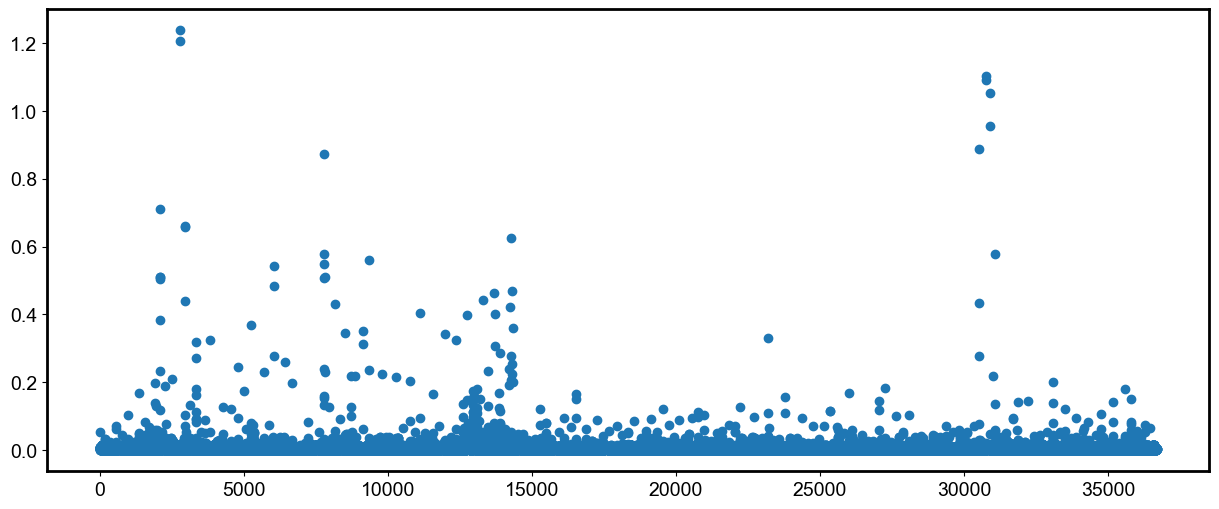

In [8]:
plt.scatter(df_gps_dist.index, df_gps_dist['Track Position'])

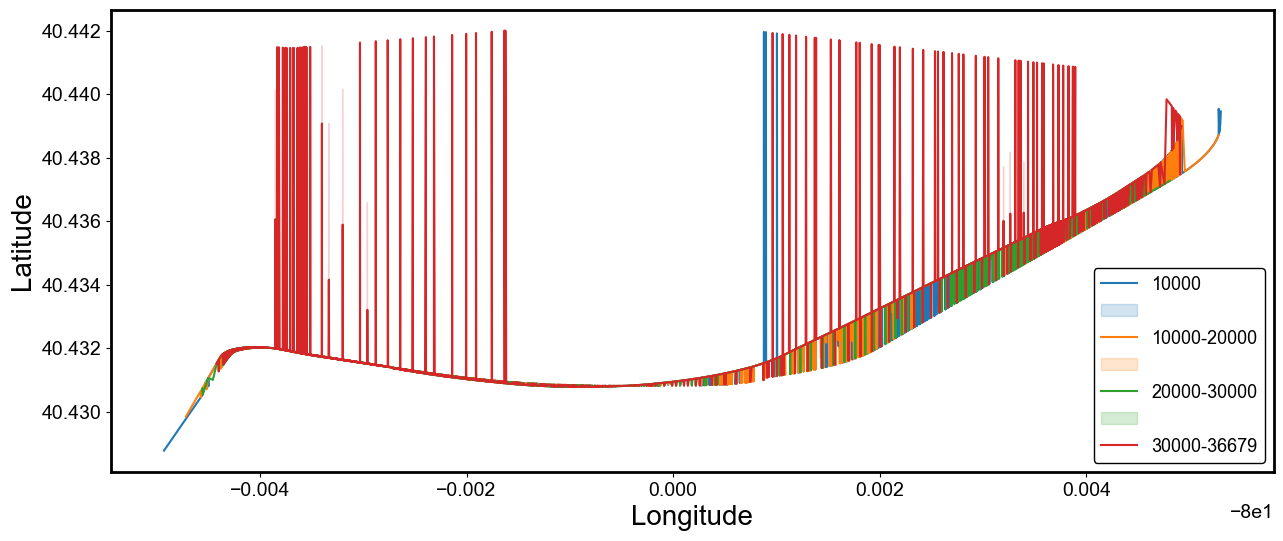

In [9]:
sns.lineplot(data=df_gps_dist[0:10000],y='Latitude',x='Longitude')
sns.lineplot(data=df_gps_dist[10000:20000],y='Latitude',x='Longitude')
sns.lineplot(data=df_gps_dist[20000:30000],y='Latitude',x='Longitude')
sns.lineplot(data=df_gps_dist[30000:],y='Latitude',x='Longitude')
plt.legend(['10000','','10000-20000','','20000-30000','','30000-36679'])



plt.savefig('regiao2_lineplot.png')

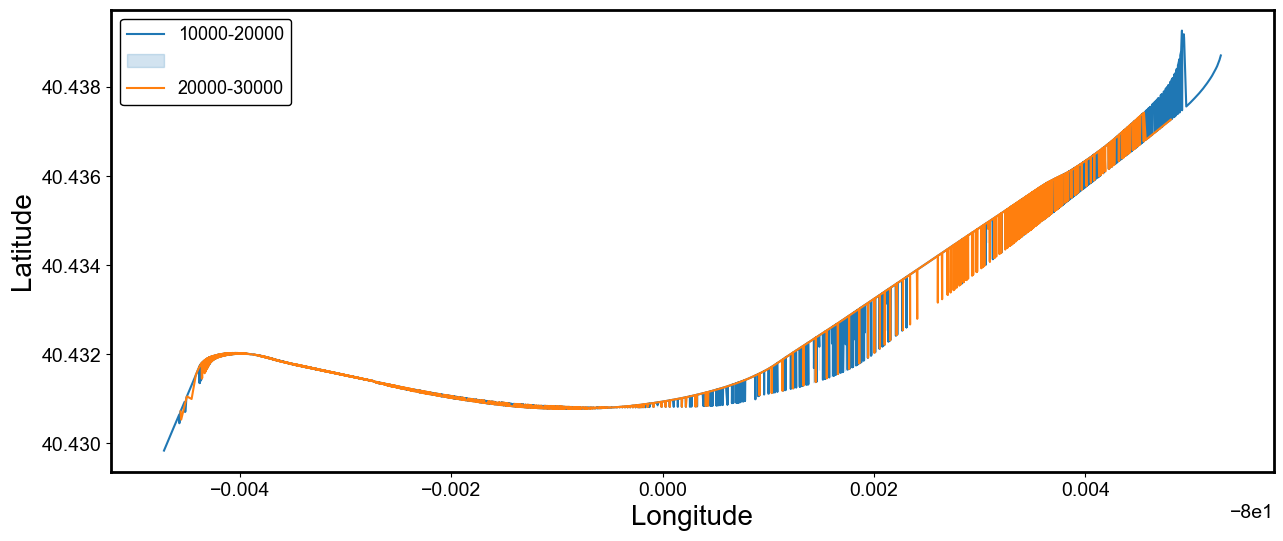

In [10]:
sns.lineplot(data=df_gps_dist[10000:20000],y='Latitude',x='Longitude')
sns.lineplot(data=df_gps_dist[20000:30000],y='Latitude',x='Longitude')
plt.legend(['10000-20000','','20000-30000'])

plt.savefig('regiao2_lineplot_reduzido.png')

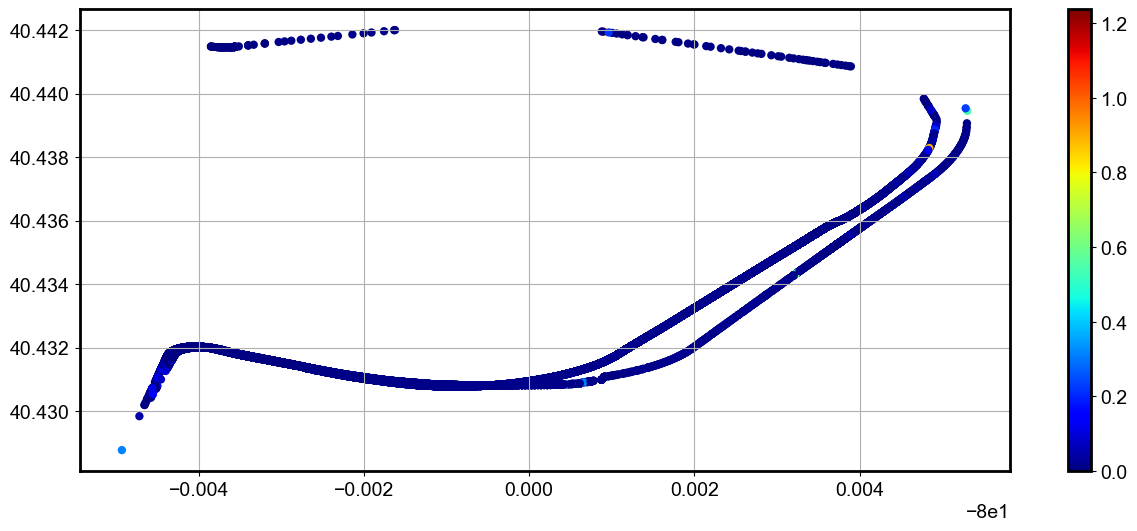

In [11]:
points = plt.scatter(x, y, c=z,cmap="jet", lw=0)
plt.colorbar(points)
plt.grid(True)

In [12]:
b = (df_gps_dist['Date'] == '2013-11-21') & (df_gps_dist['Daily_passing'] == 1) & (df_gps_dist['Direction'] == 2)

In [13]:
df = df_gps_dist[b]

In [14]:
df

,Date,Daily_passing,Region,Direction,Longitude,Latitude,Altitude,Velocidade,TimeStamp,Track Position
0,2013-11-21,1.0,2.0,2.0,-80.004409,40.431577,315.0,26.5,735553.877350,NaN
1,2013-11-21,1.0,2.0,2.0,-80.004128,40.432019,282.0,6.2,735553.877362,0.054608
2,2013-11-21,1.0,2.0,2.0,-80.004180,40.432003,225.4,8.4,735553.877373,0.004812
3,2013-11-21,1.0,2.0,2.0,-80.004101,40.432025,231.0,10.3,735553.877384,0.007207
4,2013-11-21,1.0,2.0,2.0,-80.004095,40.431993,218.3,12.8,735553.877396,0.003633
...,...,...,...,...,...,...,...,...,...,...
980,2013-11-21,1.0,2.0,2.0,-79.995638,40.437019,248.2,38.2,735557.552431,0.014632
981,2013-11-21,1.0,2.0,2.0,-79.995594,40.437112,247.4,36.1,735557.552442,0.011007
982,2013-11-21,1.0,2.0,2.0,-79.995550,40.437203,247.3,36.8,735557.552454,0.010730
983,2013-11-21,1.0,2.0,2.0,-79.995509,40.437290,246.8,35.4,735557.552465,0.010314


In [15]:
df = df.reset_index(drop = True)

In [16]:
df['Track Position'] = df['Track Position'].cumsum(axis = 0)

In [17]:
df

,Date,Daily_passing,Region,Direction,Longitude,Latitude,Altitude,Velocidade,TimeStamp,Track Position
0,2013-11-21,1.0,2.0,2.0,-80.004409,40.431577,315.0,26.5,735553.877350,NaN
1,2013-11-21,1.0,2.0,2.0,-80.004128,40.432019,282.0,6.2,735553.877362,0.054608
2,2013-11-21,1.0,2.0,2.0,-80.004180,40.432003,225.4,8.4,735553.877373,0.059419
3,2013-11-21,1.0,2.0,2.0,-80.004101,40.432025,231.0,10.3,735553.877384,0.066626
4,2013-11-21,1.0,2.0,2.0,-80.004095,40.431993,218.3,12.8,735553.877396,0.070259
...,...,...,...,...,...,...,...,...,...,...
363,2013-11-21,1.0,2.0,2.0,-79.995638,40.437019,248.2,38.2,735557.552431,2.552181
364,2013-11-21,1.0,2.0,2.0,-79.995594,40.437112,247.4,36.1,735557.552442,2.563188
365,2013-11-21,1.0,2.0,2.0,-79.995550,40.437203,247.3,36.8,735557.552454,2.573918
366,2013-11-21,1.0,2.0,2.0,-79.995509,40.437290,246.8,35.4,735557.552465,2.584232


<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

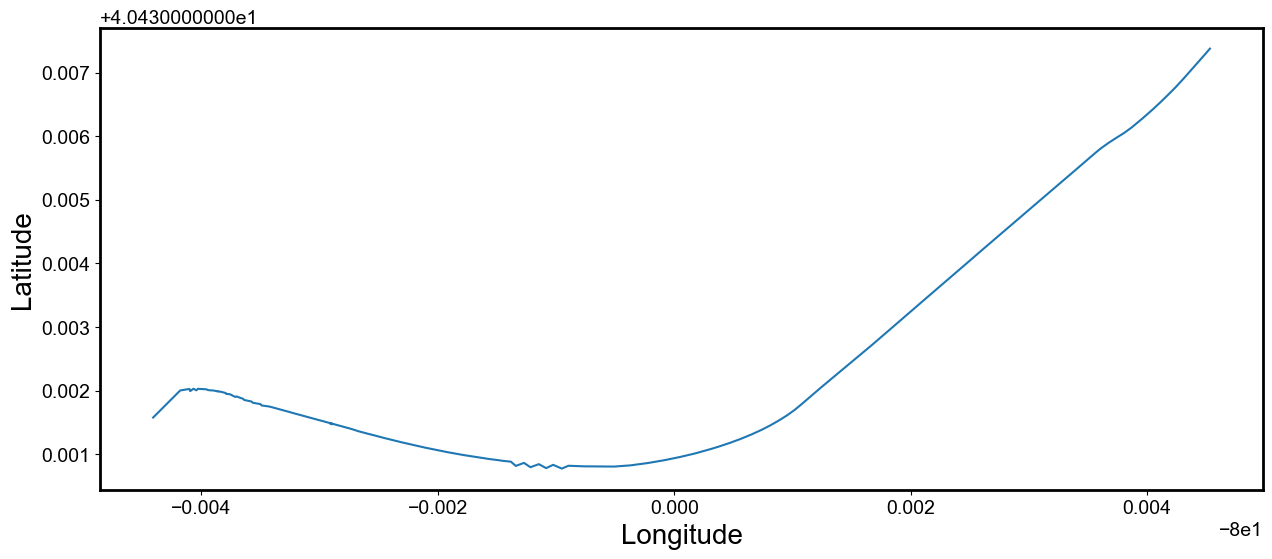

In [18]:
sns.lineplot(data=df,y='Latitude',x='Longitude')

In [19]:
x_2 = df['Longitude'][:170]
y_2 = df['Latitude'][:170]
z_2 = df['Track Position'][:170]

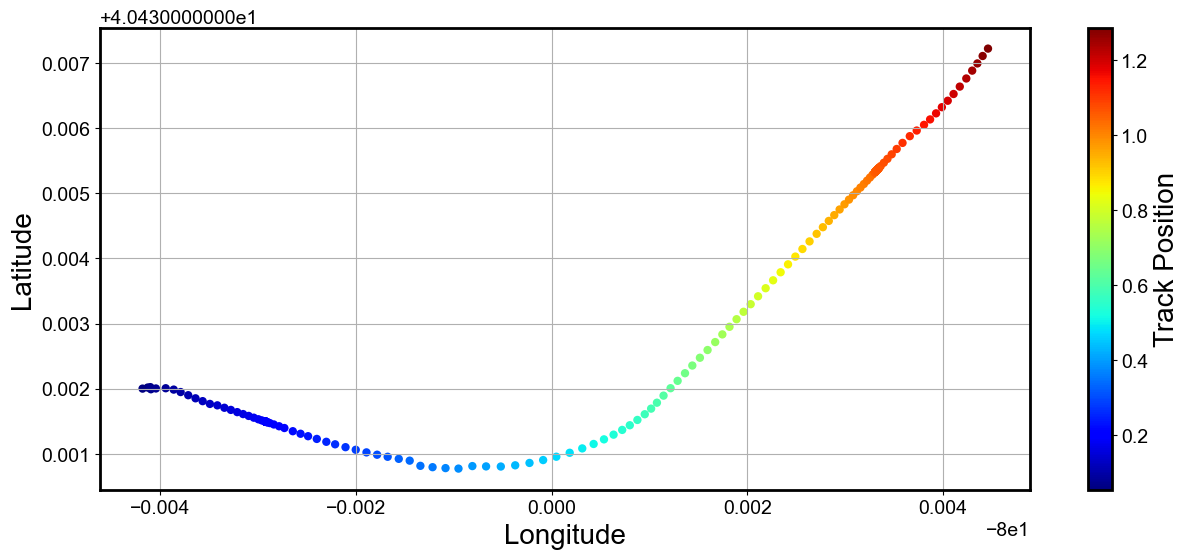

<Figure size 1500x600 with 0 Axes>

In [20]:
points = plt.scatter(x_2, y_2, c=z_2,cmap="jet", lw=0)
plt.grid(True)

cbar = plt.colorbar()
cbar.set_label('Track Position')

plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()


plt.savefig('regiao2_colorbar_dist.png')